Here we will predict the quality of wine on the basis of giving features. We use the wine quality dataset from Kaggle. This dataset has the fundamental features which are responsible for affecting the quality of the wine. By the use of several Machine learning models, we will predict the quality of the wine. Here we will only deal with the white type wine quality, we use classification techniques to check further the quality of the wine i.e. is it good or bad.
Dataset description:

In this dataset, classes are ordered, but it was not balanced. Here, red wine instances are present at a high rate and white wine instances are less than red.

These are the name of Features from the dataset -:
type
fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
quality

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import scipy.stats 
import sklearn 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import MultinomialNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier 
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('wine_quality.csv')

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1598.000000,1598.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658111,10.422622,5.635795
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169513,1.065903,0.807771
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [20]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 1
quality                 1
dtype: int64

In [21]:
df = df.dropna(axis=0) #Dropping the missing values. 

In [22]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.429044
alcohol                 0.861715
quality                 0.218565
dtype: float64

C:\Users\sudes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

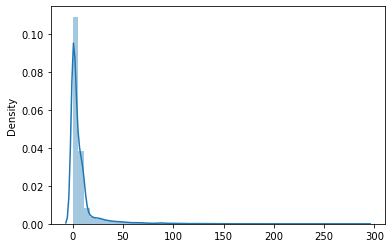

In [7]:
sns.distplot(df)

In [8]:
from scipy.stats import boxcox 
df['chlorides'] = boxcox(df['chlorides'],0)

{'whiskers': [<matplotlib.lines.Line2D at 0x249802defa0>,
 'caps': [<matplotlib.lines.Line2D at 0x249802ee700>,
 'boxes': [<matplotlib.lines.Line2D at 0x249802dec10>],
 'medians': [<matplotlib.lines.Line2D at 0x249802eee20>],
 'fliers': [<matplotlib.lines.Line2D at 0x249802fb1f0>],
 'means': []}

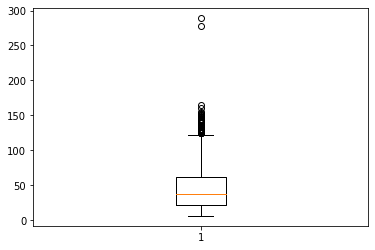

In [11]:
plt.boxplot(df['total sulfur dioxide'])

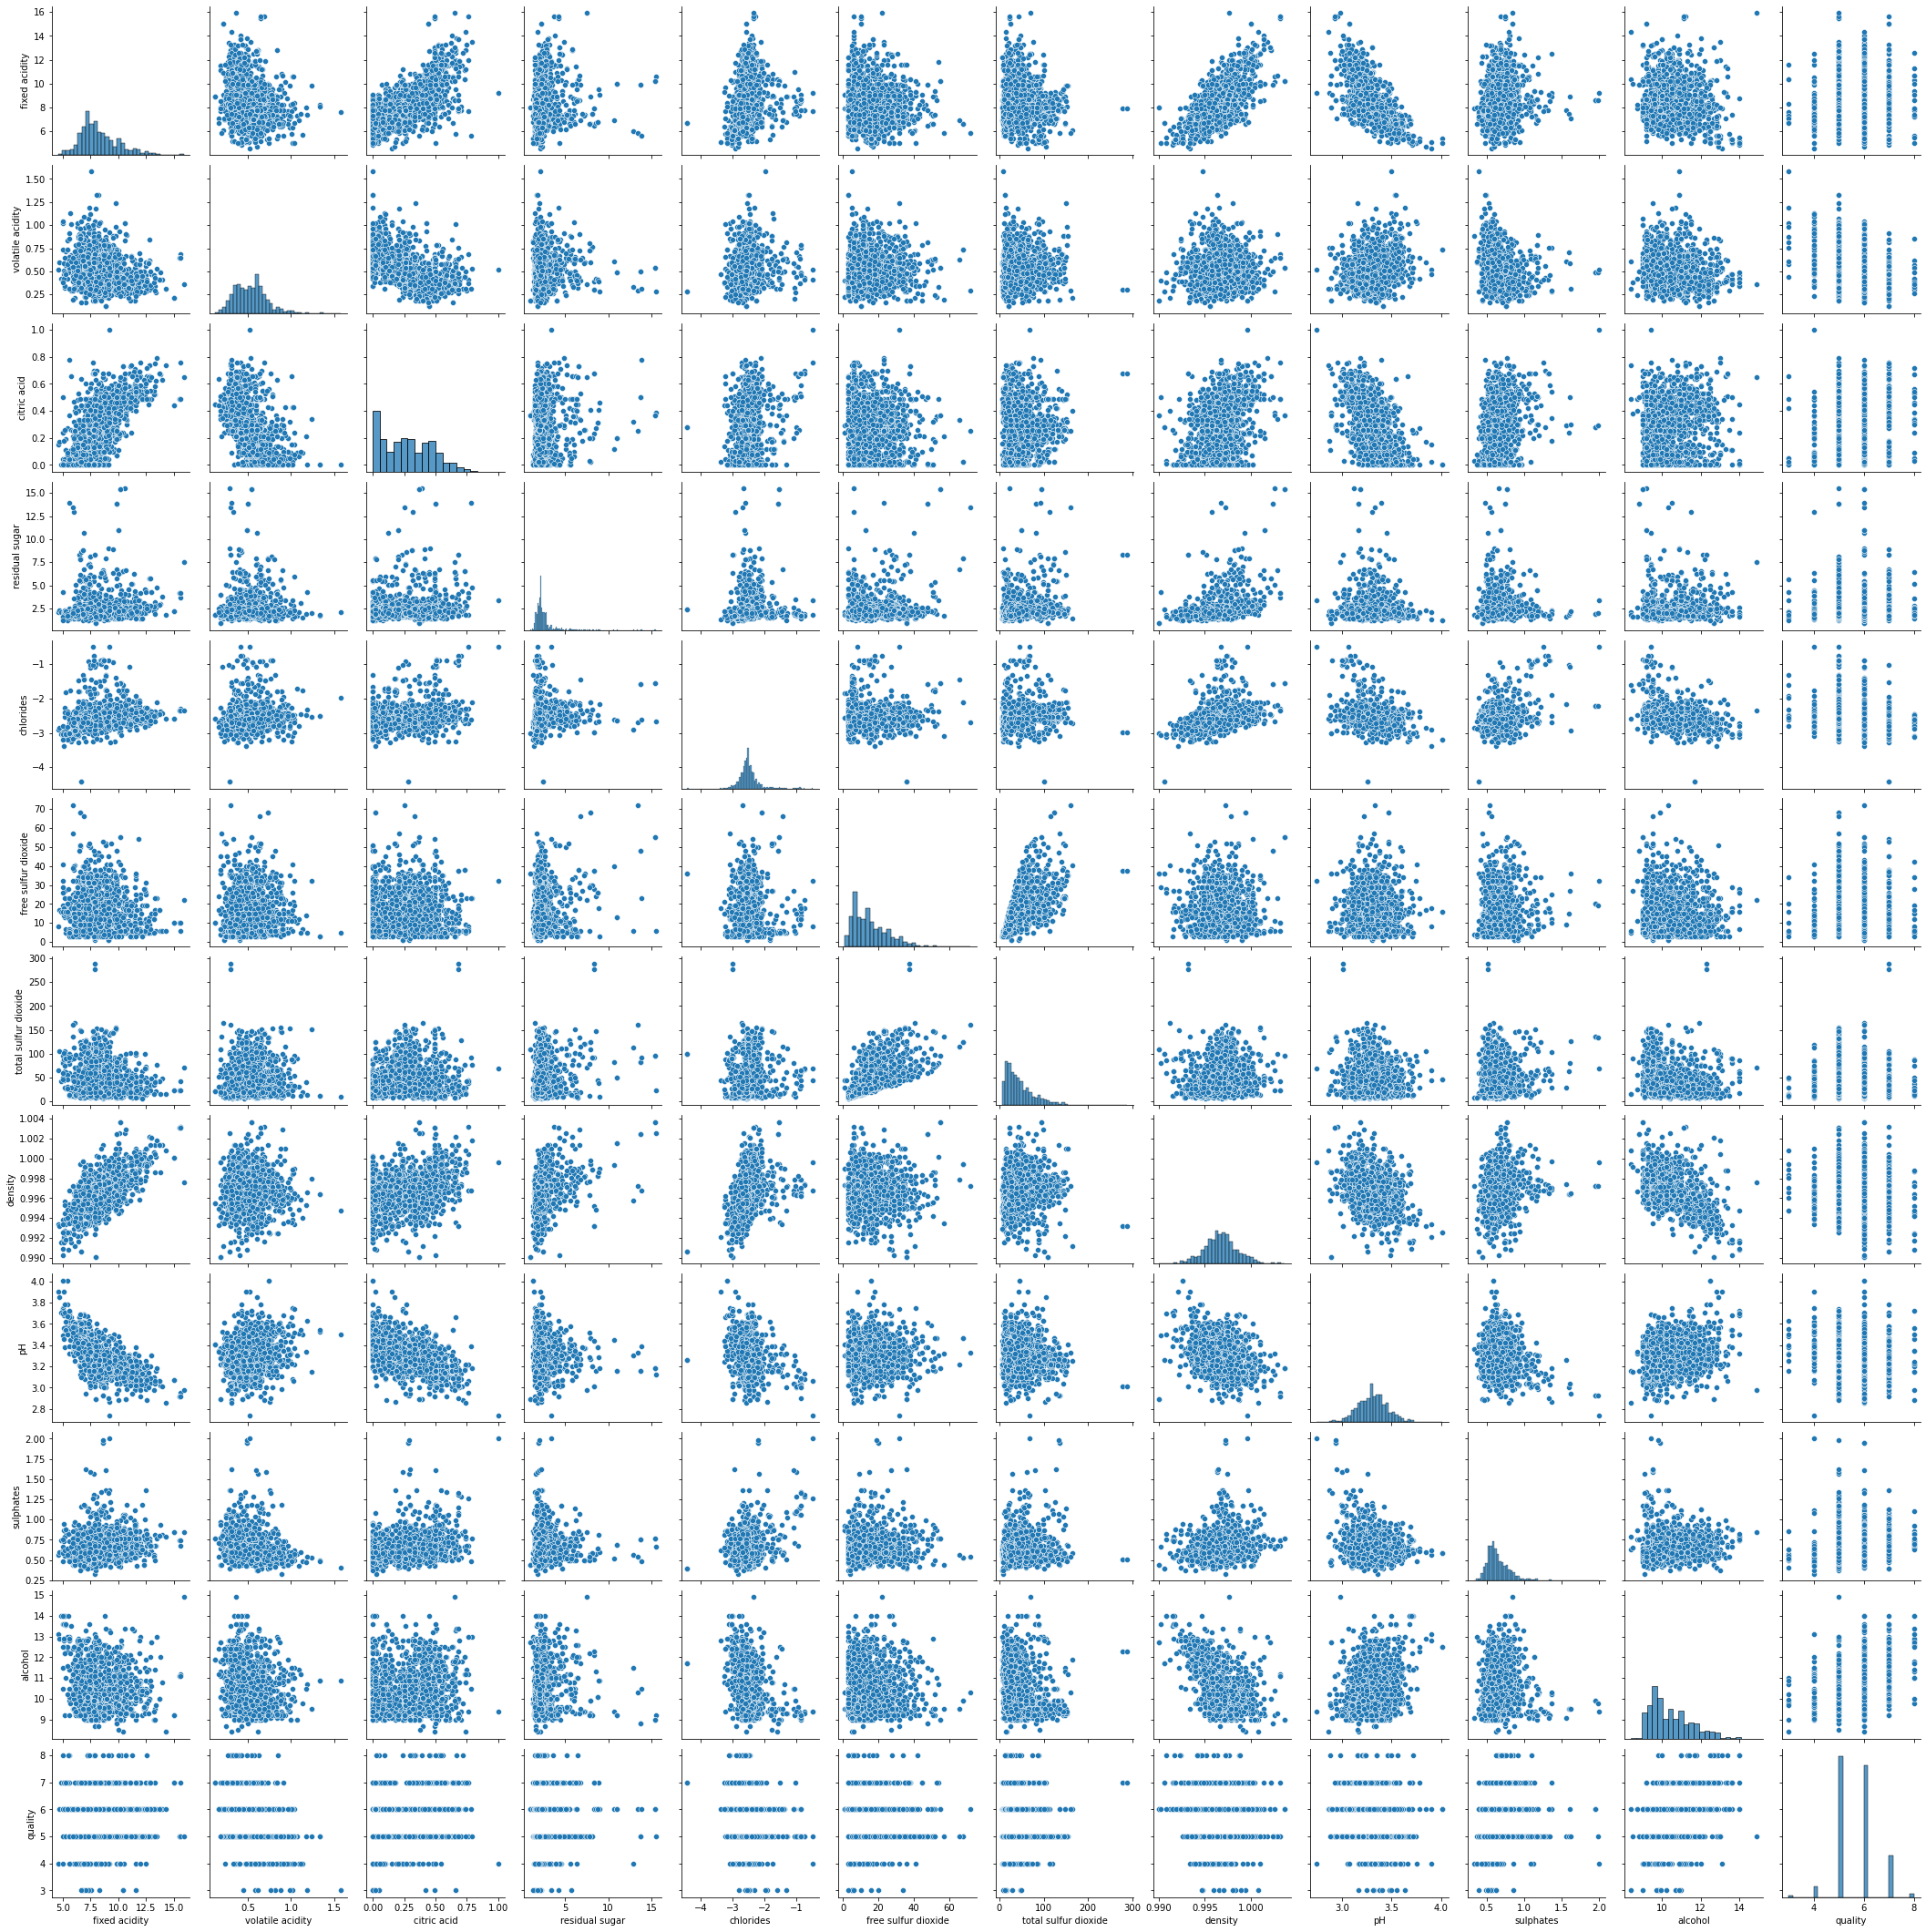

In [13]:
sns.pairplot(df)

In [12]:
df.quality.value_counts()

5.0    681
6.0    637
7.0    199
4.0     53
8.0     18
3.0     10
Name: quality, dtype: int64

In [24]:
x = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [25]:
from sklearn.model_selection import train_test_split, cross_val_score
trainx, testx, trainy, testy = train_test_split(x,y,test_size = .25, random_state = 45)

In [26]:
sm = SMOTE() #Applying SMOTE technique to make data balanced. 
trainx, trainy = sm.fit_resample(x,y)

In [27]:
trainx.shape

(4086, 11)

In [28]:
testx.shape

(400, 11)

In [29]:
trainy.shape

(4086,)

In [30]:
testy.shape

(400,)

In [31]:
dt = DecisionTreeClassifier()
svc = SVC()
mnb = MultinomialNB()
knn = KNeighborsClassifier()

In [34]:
dt.fit(trainx,trainy)
dt.score(trainx,trainy)

1.0

In [36]:
dtpred = dt.predict(testx)

In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [39]:
print("Accuracy_score: ", accuracy_score(testy,dtpred))
print("Classification Report: ", classification_report(testy, dtpred))
print("Confusion matrix: ", confusion_matrix(testy, dtpred))

Accuracy_score:  1.0
Classification Report:                precision    recall  f1-score   support

         3.0       1.00      1.00      1.00         4
         4.0       1.00      1.00      1.00        11
         5.0       1.00      1.00      1.00       171
         6.0       1.00      1.00      1.00       165
         7.0       1.00      1.00      1.00        43
         8.0       1.00      1.00      1.00         6

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

Confusion matrix:  [[  4   0   0   0   0   0]
 [  0  11   0   0   0   0]
 [  0   0 171   0   0   0]
 [  0   0   0 165   0   0]
 [  0   0   0   0  43   0]
 [  0   0   0   0   0   6]]


C:\Users\sudes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

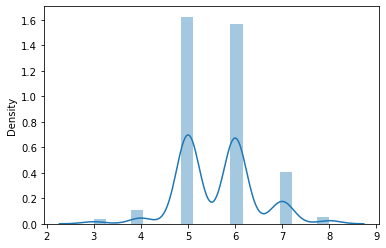

In [40]:
sns.distplot(dtpred)

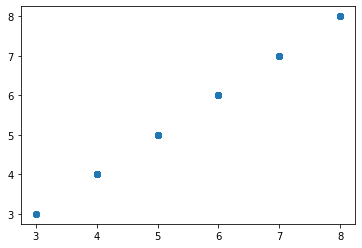

In [41]:
plt.scatter(testy, dtpred)

In [42]:
svc.fit(trainx, trainy)

SVC()

In [43]:
svcpred = svc.predict(testx)

In [44]:
print("Accuracy_score: ", accuracy_score(testy,svcpred))
print("Classification Report: ", classification_report(testy, svcpred))
print("Confusion matrix: ", confusion_matrix(testy, svcpred))

Accuracy_score:  0.38
Classification Report:                precision    recall  f1-score   support

         3.0       0.06      0.75      0.11         4
         4.0       0.11      0.18      0.13        11
         5.0       0.74      0.42      0.53       171
         6.0       0.48      0.40      0.44       165
         7.0       0.14      0.12      0.13        43
         8.0       0.08      0.83      0.15         6

    accuracy                           0.38       400
   macro avg       0.27      0.45      0.25       400
weighted avg       0.53      0.38      0.43       400

Confusion matrix:  [[ 3  0  1  0  0  0]
 [ 2  2  1  5  1  0]
 [24  7 71 57  6  6]
 [19  8 21 66 22 29]
 [ 5  2  2  9  5 20]
 [ 0  0  0  0  1  5]]


In [45]:
knn.fit(trainx, trainy)

KNeighborsClassifier()

In [46]:
knn.predict(testx)

array([6., 4., 4., 6., 7., 7., 5., 4., 6., 7., 5., 5., 6., 6., 6., 8., 6.,
       3., 6., 5., 3., 7., 6., 7., 6., 5., 5., 5., 5., 6., 5., 5., 6., 5.,
       7., 5., 4., 4., 4., 6., 5., 5., 5., 3., 7., 5., 8., 3., 4., 6., 5.,
       3., 6., 6., 4., 5., 5., 7., 6., 5., 5., 3., 4., 8., 5., 4., 4., 7.,
       4., 6., 5., 8., 7., 5., 6., 7., 5., 3., 5., 5., 6., 5., 5., 5., 4.,
       7., 5., 5., 6., 8., 5., 6., 5., 3., 5., 5., 5., 5., 7., 7., 5., 6.,
       6., 7., 3., 5., 4., 6., 4., 6., 5., 5., 5., 8., 6., 6., 3., 6., 5.,
       3., 4., 5., 5., 5., 7., 8., 6., 5., 5., 5., 8., 5., 6., 5., 6., 5.,
       7., 5., 5., 5., 7., 5., 5., 7., 5., 5., 5., 3., 7., 5., 7., 5., 4.,
       5., 6., 7., 7., 6., 5., 5., 4., 6., 4., 7., 8., 5., 5., 4., 8., 8.,
       3., 4., 6., 5., 4., 5., 6., 5., 4., 8., 7., 6., 6., 4., 6., 6., 7.,
       6., 5., 5., 3., 4., 5., 5., 6., 7., 5., 6., 4., 6., 6., 7., 5., 6.,
       3., 6., 5., 5., 7., 6., 7., 6., 4., 6., 6., 7., 6., 3., 6., 6., 5.,
       6., 5., 5., 5., 6.

In [47]:
print("Accuracy_score: ", accuracy_score(testy,knn.predict(testx)))
print("Classification Report: ", classification_report(testy,knn.predict(testx)))
print("Confusion matrix: ", confusion_matrix(testy, knn.predict(testx)))

Accuracy_score:  0.6325
Classification Report:                precision    recall  f1-score   support

         3.0       0.16      1.00      0.28         4
         4.0       0.24      1.00      0.39        11
         5.0       0.82      0.70      0.75       171
         6.0       0.77      0.45      0.57       165
         7.0       0.60      0.86      0.70        43
         8.0       0.26      1.00      0.41         6

    accuracy                           0.63       400
   macro avg       0.47      0.84      0.52       400
weighted avg       0.74      0.63      0.65       400

Confusion matrix:  [[  4   0   0   0   0   0]
 [  0  11   0   0   0   0]
 [ 12  13 120  19   3   4]
 [  9  22  25  75  22  12]
 [  0   0   2   3  37   1]
 [  0   0   0   0   0   6]]


Only DecisionTreeClassifier algorithm is working accurtely with the model. The accuracy score of the same is 1.0. 